In [1]:
import zipfile
import os

zip_path = "/content/house-prices-advanced-regression-techniques.zip"  # adjust if name differs

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/house_data")

os.listdir("/content/house_data")


['train.csv', 'test.csv', 'sample_submission.csv', 'data_description.txt']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
train_df = pd.read_csv("/content/house_data/train.csv")

train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape


(1460, 81)

In [5]:
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])
numeric_df.shape


(1460, 38)

In [6]:
numeric_df = numeric_df.fillna(numeric_df.mean())


In [7]:
X = numeric_df.drop("SalePrice", axis=1)
y = numeric_df["SalePrice"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)


In [11]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.8227439852048932


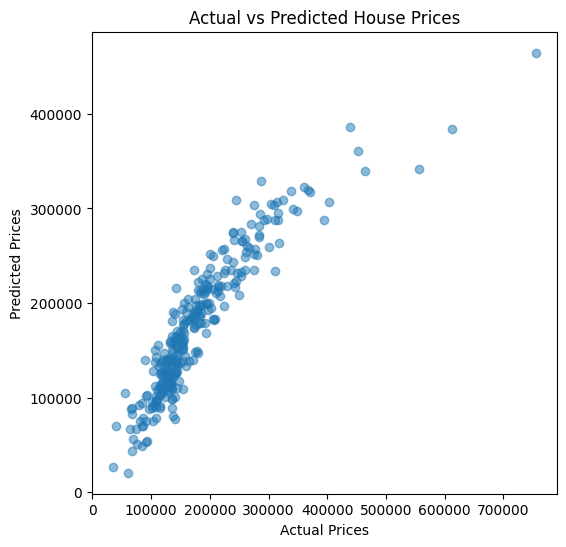

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
